In [24]:
# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import utils
import dataset
import visualizations
from prediction_age import AgePredictor, AgePredictorComparison
from preprocessing import *

# external libs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt

import shap

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [2]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

In [10]:
%load_ext autoreload
%autoreload 2

## Data

In [3]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)
data_france_sample = data_france.sample(frac=.1)

In [6]:
path_data_france_extra_attributes = os.path.join('..', 'data', 'france-gov_extra_attrib.csv')
data_france_extra_attributes = pd.read_csv(path_data_france_extra_attributes)

In [ ]:
path_data_france_attributes = os.path.join('..', 'data', 'france-gov_attrib.csv')
data_france_attributes = pd.read_csv(path_data_france_attributes)

In [ ]:
path_data_netherlands = os.path.join('..', 'data', 'netherlands-cities-200.csv')
data_netherlands = pd.read_csv(path_data_netherlands)
data_netherlands_sample = data_netherlands.sample(frac=.1)

In [ ]:
xgb_params_optimal = {
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'colsample_bytree': 0.5,
    'subsample': 1.0,
}

## Preprocessing

In [11]:
data_france_extra_attributes.columns
# data_france_extra_attributes['Z_MIN_SOL'].unique()

Index(['id', 'PREC_ALTI', 'MAT_MURS', 'MAT_TOITS', 'Z_MIN_SOL', 'Z_MIN_TOIT',
       'Z_MAX_TOIT'],
      dtype='object')

In [14]:
data_france['type_source'].unique()
# len(df[df['type_source'] == 'Annexe'])



array(['Annexe', 'Commercial et services', 'Résidentiel', 'Indifférencié',
       'Industriel', 'Agricole', 'Sportif', 'Religieux'], dtype=object)

In [18]:
print(len(data_france_attributes))
print(len(data_france_attributes.dropna(subset=['type_source'])) / len(data_france_attributes))

47852589
47852589


## Experiments

2022-02-07 17:21:02,850 | INFO : Dataset length: 86137
2022-02-07 17:21:02,929 | INFO : Test dataset length: 17228
2022-02-07 17:21:02,930 | INFO : Training dataset length: 68909
2022-02-07 17:21:02,932 | INFO : Standard deviation of test set: 81.53024582095382
2022-02-07 17:21:02,934 | INFO : Mean age of test set: 1931.6767471557928
2022-02-07 17:21:03,021 | INFO : Test dataset length after preprocessing: 12404
2022-02-07 17:21:03,021 | INFO : Training dataset length after preprocessing: 49831
2022-02-07 17:21:03,023 | INFO : Standard deviation of test set after preprocessing: 32.10575556810843
2022-02-07 17:21:03,024 | INFO : Mean age of test set after preprocessing: 1974.337794259916
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


MAE: 2566.037188744322 y
RMSE: 2566.2491807149336 y
R2: -6388.4999553604675


ValueError: `bins[0]` must be positive, when an integer

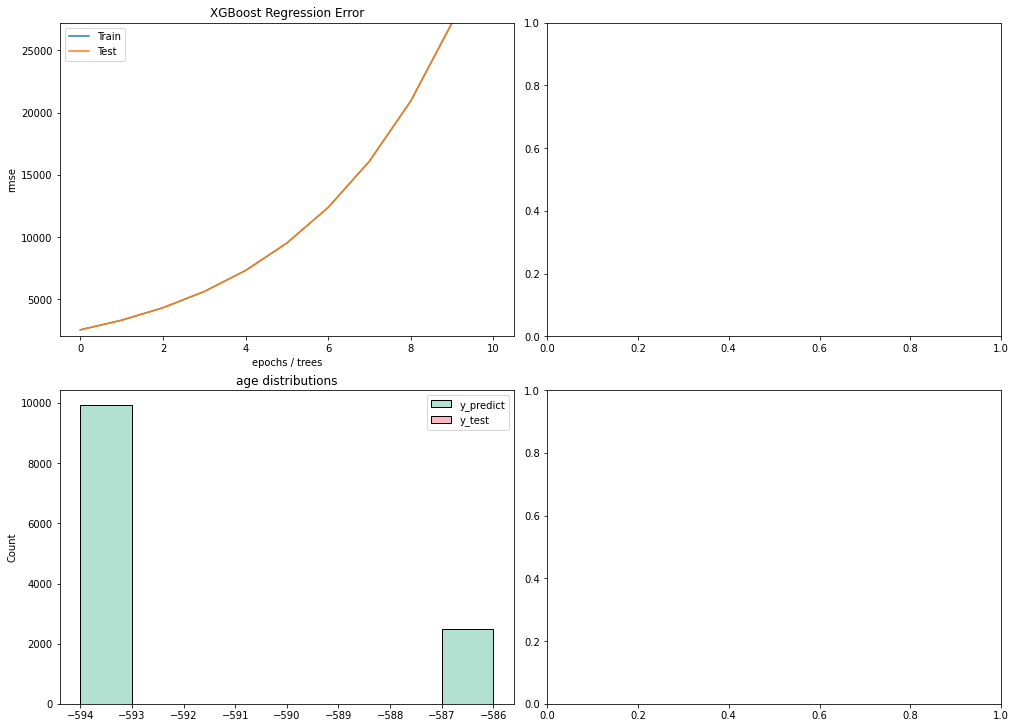

In [28]:
predictor = AgePredictor(
    model=XGBRegressor(objective=custom_sne),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1900]
)
predictor.evaluate_regression()

2022-02-07 17:14:53,038 | INFO : Dataset length: 862167
2022-02-07 17:14:54,539 | INFO : Test dataset length: 172434
2022-02-07 17:14:54,540 | INFO : Training dataset length: 689733
2022-02-07 17:14:54,544 | INFO : Standard deviation of test set: 81.12370725867302
2022-02-07 17:14:54,546 | INFO : Mean age of test set: 1932.0776818956817
2022-02-07 17:14:56,100 | INFO : Test dataset length after preprocessing: 103012
2022-02-07 17:14:56,100 | INFO : Training dataset length after preprocessing: 413268
2022-02-07 17:14:56,103 | INFO : Standard deviation of test set after preprocessing: 31.23749982323458
2022-02-07 17:14:56,104 | INFO : Mean age of test set after preprocessing: 1975.1481089581796
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


MAE: 17.77236139068408 y
RMSE: 24.370780667257996 y
R2: 0.39131785152673837


invalid value encountered in true_divide


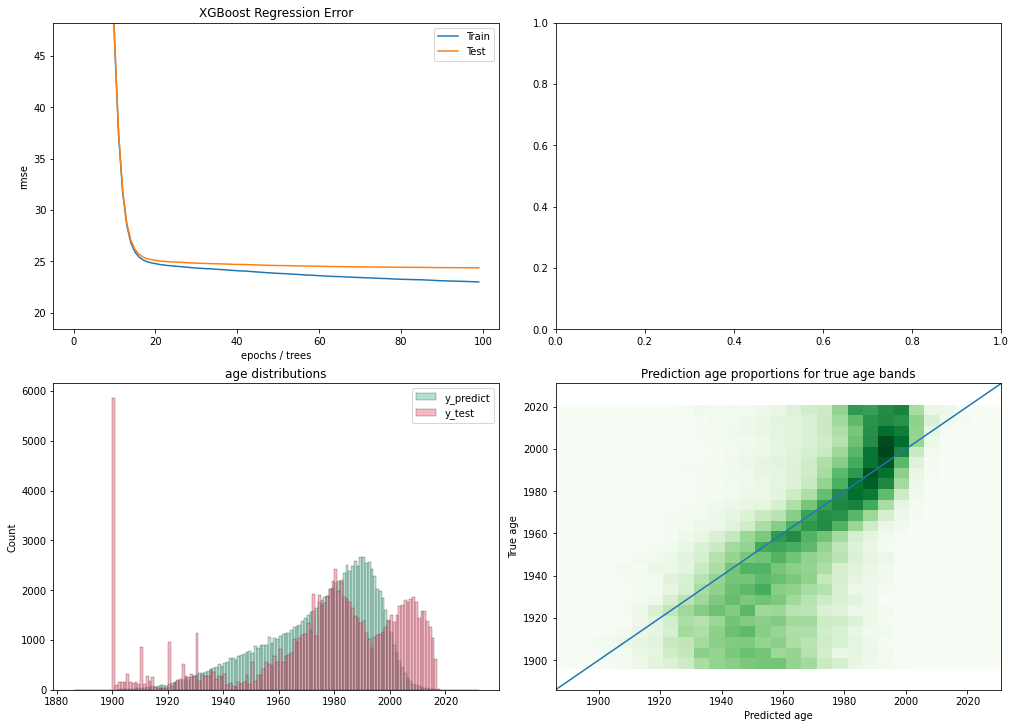

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

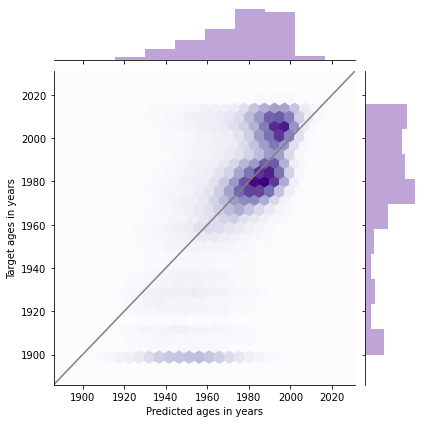

In [20]:
predictor_base = AgePredictor(
    model=XGBRegressor(),
    df=data_france,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1900, remove_non_residential_buildings]
)
predictor_base.evaluate_regression()

2022-02-07 17:12:45,475 | INFO : Dataset length: 862167
2022-02-07 17:12:46,982 | INFO : Test dataset length: 172434
2022-02-07 17:12:46,983 | INFO : Training dataset length: 689733
2022-02-07 17:12:46,987 | INFO : Standard deviation of test set: 81.12370725867302
2022-02-07 17:12:46,989 | INFO : Mean age of test set: 1932.0776818956817
2022-02-07 17:12:48,189 | INFO : Test dataset length after preprocessing: 103012
2022-02-07 17:12:48,190 | INFO : Training dataset length after preprocessing: 413268
2022-02-07 17:12:48,194 | INFO : Standard deviation of test set after preprocessing: 31.23749982323458
2022-02-07 17:12:48,195 | INFO : Mean age of test set after preprocessing: 1975.1481089581796
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


MAE: 17.77236139068408 y
RMSE: 24.370780667257996 y
R2: 0.39131785152673837


invalid value encountered in true_divide


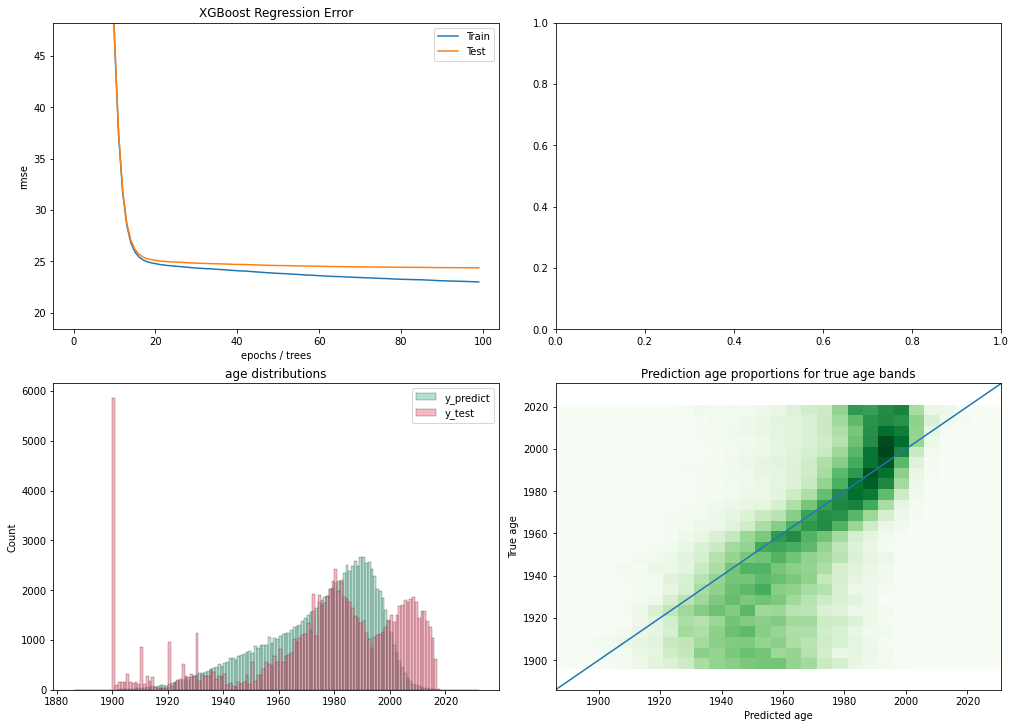

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

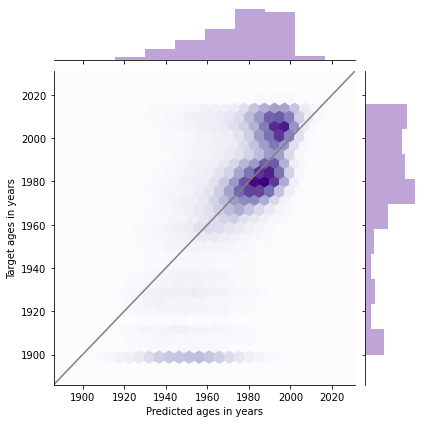

In [19]:
predictor = AgePredictor(
    model=XGBRegressor(obj=custom_sne),
    df=data_france,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1900, remove_non_residential_buildings]
)
predictor.evaluate_regression()

2022-01-29 20:10:31,843 | INFO : Dataset length: 86269
2022-01-29 20:10:31,925 | INFO : Test dataset length: 17254
2022-01-29 20:10:31,926 | INFO : Training dataset length: 69015
2022-01-29 20:10:31,927 | INFO : Standard deviation of test set: 81.53298382642525
2022-01-29 20:10:31,928 | INFO : Mean age of test set: 1932.0508287933233
2022-01-29 20:10:32,013 | INFO : Test dataset length after preprocessing: 12441
2022-01-29 20:10:32,014 | INFO : Training dataset length after preprocessing: 49966
2022-01-29 20:10:32,015 | INFO : Standard deviation of test set after preprocessing: 31.988179564020207
2022-01-29 20:10:32,016 | INFO : Mean age of test set after preprocessing: 1974.5702917771882
2022-01-29 20:10:38,296 | INFO : Dataset length: 86269
2022-01-29 20:10:38,391 | INFO : Test dataset length: 17254
2022-01-29 20:10:38,392 | INFO : Training dataset length: 69015
2022-01-29 20:10:38,393 | INFO : Standard deviation of test set: 81.53298382642525
2022-01-29 20:10:38,394 | INFO : Mean ag

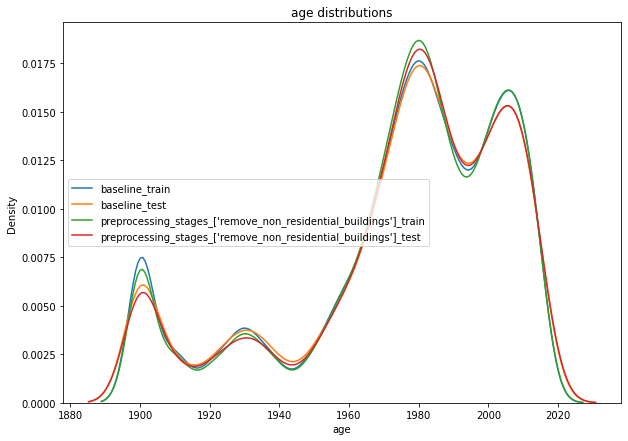

,name,R2,MAE,RMSE
0,baseline,0.307174,19.757817,26.624658
1,preprocessing_stages_['remove_non_residential_...,0.347525,18.603559,25.353269


In [30]:
comparison_args = {'preprocessing_stages': [[remove_buildings_pre_1900, remove_non_residential_buildings]]}
comparison = AgePredictorComparison(
    model=XGBRegressor(),
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_buildings_pre_1900],
    comparison_args=comparison_args,
)
comparison.evaluate_comparison()

In [1]:
comparison.predictors['baseline'].prediction_error_distribution()

NameError: name 'comparison' is not defined

In [15]:
predictor.prediction_error_distribution()

Distribution of prediction error:                 age
count  12404.000000
mean       0.177430
std       26.725716
min      -98.258179
25%      -16.209686
50%       -1.618103
75%       12.673645
max      109.949219
Prediction error bins: [('<10', 0.36), ('10-19', 0.27), ('>=20', 0.37)]


array([0.35940019, 0.27136408, 0.36923573])